<h1><center> Markov chain Monte Carlo (MCMC) inference</center></h1>
# 1.Basic
In the previous chapter, we have introduced some simple Monte Carlo methods, including rejection sampling and importance sampling. The trouble with these methods is that they do not work well in **high dimensional spaces**.The most popular method for sampling from high-dimensional distributions is **Markov chain Monte Carlo (MCMC)**.

The basic idea behind MCMC is to construct a Markov chain on the state space whose stationary distribution is the target density $p(\vec{x})$. That is, we perform a random walk on the state space, in such a way that the fraction of the time we spend in each state $\vec{x}$ is proportional to $p(\vec{x})$. By drawing (correlated) samples $\vec{x}_0,\vec{x}_1,\ldots$ from the chain, we can perform Monte Carlo integration wrt $p(x)$.

# 2. Gibbs sampling
The idea behind Gibbs sampling is that we sample each variable in turn,conditioned on the values of all the other variables in the distribution. That is ,given a joint sample $\vec{x}^s$ of all the variables, we generate a new sample $\vec{x}^{s+1}$ by sampling each component in turn, based on the most recent values of the other variables. For example, if we have $D=3$ variables, we use
* $x_1^{s+1} \sim p(x_1|x_2^s,x_3^s)$
* $x_2^{s+1} \sim p(x_2|x_1^{s+1},x_3^s)$
* $x_3^{s+1} \sim p(x_3|x_1^{s+1},x_2^{s+1})$

This readily generalizes to $D$ variables. If $x_i$ is a visible variable, we do not sample it, since its value is already known.

The expression $p(x_i|x_{-i})$ is called the **full conditional** for variable $i$. In general, $x_i$ may only depend on some of the other variables. If we represent $p(\vec{x})$ as a graphical model, we can infer the dependencies by looking at $i$'s Markov blanket. Thus to sample $x_i$, we only need to know the values of $i$'s Markov blanket.
### Example:Gibbs sampling for inferring the parameters of a GMM
![1.png](imgs/1.png)
It is straightforward to derive a Gibbs sampling algorithm to "fit" a mixture model,especially if we use conjugate prior. The full joint distribution is given by
\begin{align}
p(\vec{x}_{1:N},z_{1:N},\mu_{1:K},\Sigma_{1:K},\vec{\pi}) &=p(\vec{\pi})p(z_{1:N}|\vec{\pi})\prod_{k=1}^K \left[p(\Sigma_k)p(\mu_k|\Sigma_k)\right]\, p(\vec{x}_{1:N}|z_{1:N},\mu_{1:K},\Sigma_{1:K})\\
&=Dir(\vec{\pi}|\alpha)\quad \prod_{i=1}^N \prod_{k=1}^K (\pi_k)^{\mathbb{I}(z_i=k)} \quad \prod_{k=1}^K \left[NIW(\mu_k,\Sigma_k|\mu_{0k},\lambda_{0k},\Psi_{0k},\nu_{0k})\right]\quad \prod_{i=1}^N \prod_{k=1}^K \left[ \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} \\
&=Dir(\vec{\pi}|\alpha)\quad \prod_{i=1}^N \prod_{k=1}^K \left[ \pi_k \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} \quad \prod_{k=1}^K \left[NIW(\mu_k,\Sigma_k|\mu_{0},\lambda_{0},\Psi_{0},\nu_{0})\right]
\end{align}
We use the same prior $NIW(\mu_k,\Sigma_k|\mu_{0},\lambda_{0},\Psi_{0},\nu_{0})$ for each mixture component. 

For the discrete indicators, we have
\begin{align}
p(z_{1:N}|\vec{x}_{1:N},\mu_{1:K},\Sigma_{1:K},\vec{\pi})  &=\prod_{i=1}^N p(z_i |\vec{x}_i,\mu_{1:K},\Sigma_{1:K},\vec{\pi}) \\
&=\prod_{i=1}^N \frac{p(\vec{x}_i|z_i,\mu_{1:K},\Sigma_{1:K},\vec{\pi})p(z_i|\mu_{1:K},\Sigma_{1:K},\vec{\pi})}{p(\vec{x}_i|\mu_{1:K},\Sigma_{1:K},\vec{\pi})} \\
&=\prod_{i=1}^N \frac{p(\vec{x}_i|z_i,\mu_{1:K},\Sigma_{1:K})p(z_i|\vec{\pi})}{p(\vec{x}_i|\mu_{1:K},\Sigma_{1:K},\vec{\pi})} \\
\end{align}
For the mixing weights, we have
\begin{align}
p(\vec{\pi}|\vec{x}_{1:N},z_{1:N},\mu_{1:K},\Sigma_{1:K}) &=p(\vec{\pi}|z_{1:N}) \\
                                                      &=\frac{p(z_{1:N}|\vec{\pi})p(\vec{\pi})}{p(z_{1:N})} \\
                                                    &=Dir(\{\alpha_k+\sum_{i=1}^N\mathbb{I}(z_i=k)\}_{k=1}^K)\\
\end{align}
For the means and the variance, we have
\begin{align}
p(\mu_{1:K},\Sigma_{1:K}|\vec{x}_{1:N},z_{1:N},\vec{\pi}) &=p(\mu_{1:K},\Sigma_{1:K}|\vec{x}_{1:N},z_{1:N})  \\
&=\frac{p(\vec{x}_{1:N}|z_{1:N},\Sigma_{1:K},\mu_{1:K})p(\mu_{1:K},\Sigma_{1:K}|z_{1:N})}{p(\vec{x}_{1:N}|z_{1:N})} \\
&=\frac{p(\vec{x}_{1:N}|z_{1:N},\Sigma_{1:K},\mu_{1:K})p(\mu_{1:K},\Sigma_{1:K})}{p(\vec{x}_{1:N}|z_{1:N})} \\
&=\frac{\prod_{i=1}^N \prod_{k=1}^K \left[ \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} p(\mu_{1:K},\Sigma_{1:K})}{p(\vec{x}_{1:N}|z_{1:N})} \\
&=\frac{\prod_{k=1}^K \left\{\prod_{i=1}^N \left[ \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} p(\mu_k,\Sigma_k)\right\}}{p(\vec{x}_{1:N}|z_{1:N})} \\
&=\frac{\prod_{k=1}^K \left\{\prod_{i=1}^N \left[ \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} p(\mu_k,\Sigma_k)\right\}}{p(\vec{x}_{1:N}|z_{1:N})} \\
\end{align}
where $p(\mu_k,\Sigma_k)$ is a NIW distribution, the marginal distribution $p(\mu_{1:K},\Sigma_{1:K}|\vec{x}_{1:N},z_{1:N},\vec{\pi})$ is again a NIW distribution.

The sampled prior probability for each cluster is:
array([0.51313698, 0.30180413, 0.18505888])
The true prior probability for each cluster is:
[0.2, 0.5, 0.3]


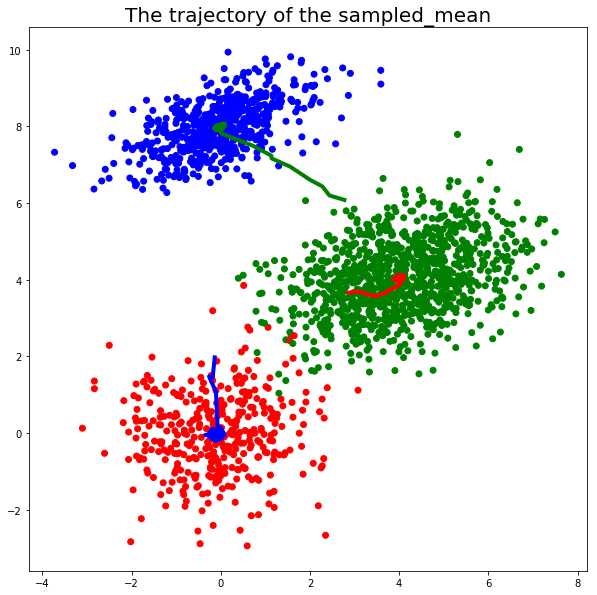

In [11]:
# Gibbs sampling for inferring the parameters of a GMM
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
from pprint import pprint

np.random.seed(42)
plt.figure(figsize=(10,10))

#true center of each cluster
true_means=[[0,0],
           [4,4],
           [0,8]]

#true variance of each cluster
true_covariance=[[[1.0,0],
                 [0,1.0]],
                [[1.6,0.4],
                [0.4,1.0]],
                [[1.0,0.4],
                [0.4,0.5]]]

#true prior probability of each cluster
true_pi=[0.2,0.5,0.3]

n_samples=2000
true_label=[]
samples=[]
for i in range(n_samples):
    label=stats.multinomial.rvs(n=1,p=true_pi,size=1).argmax()
    true_label.append(label)
    samples.append(stats.multivariate_normal(mean=true_means[label],
                                                   cov=true_covariance[label]).rvs())
true_label=np.array(true_label).astype(int)
samples=np.array(samples)
colors=np.array(['r','g','b'])
plt.scatter(samples[:,0],samples[:,1],c=colors[true_label])

sampled_label_old=np.zeros(n_samples)
# random set the initial label
for i in range(n_samples):
    sampled_label_old[i]=stats.multinomial.rvs(n=1,p=[1.0/3,1.0/3,1.0/3],size=1).argmax()
sampled_label_old=sampled_label_old.astype(int)

sampled_mean_old=np.random.randn(3,2)+np.mean(samples,axis=0)
sampled_variance_old=np.vstack(tuple([np.identity(2)]*3)).reshape((3,2,2))
sampled_pi_old=np.array([1.0/3,1.0/3,1.0/3])

sampled_sequences=[]
n_sequences=500
for i in range(n_sequences):
    # first sample z_i
    likelihood=np.zeros((n_samples,3))
    for j in range(3):
        likelihood[:,j]=stats.multivariate_normal(mean=sampled_mean_old[j],
                                            cov=sampled_variance_old[j]).pdf(samples)*sampled_pi_old[j]
    likelihood=likelihood/ np.sum(likelihood,axis=1,keepdims=True)
    #generate new sample z_i
    sampled_label_new=np.zeros(n_samples)
    for k in range(n_samples):
        sampled_label_new[k]=stats.multinomial.rvs(n=1,p=likelihood[k],size=1).argmax()

    # second sample pi
    count=np.zeros(3)
    count[0]=(sampled_label_new==0).sum()
    count[1]=(sampled_label_new==1).sum()
    count[2]=(sampled_label_new==2).sum()  
    sampled_pi_new=stats.dirichlet.rvs(alpha=count+1).reshape(-1)  # +1 means laplace smooth
    
    # Third joint sample mean and variance using NIW distribution, but unfortunately, there is no NIW
    # distribution ready to be used. So we will must sample mean and variance seperated. The formula was
    # referred to MLAPP page 840
    sampled_mean_new=np.zeros((3,2))
    for k in range(3):
        sample_mean=np.mean(samples[sampled_label_new==k],axis=0)
        mean_variance=np.linalg.inv(np.identity(2)+count[k]*np.linalg.inv(sampled_variance_old[k]))
        mean_mean=np.matmul(mean_variance,(count[k]*np.matmul(np.linalg.inv(sampled_variance_old[k]),
                                                             sample_mean).reshape(-1)+
                                          np.mean(samples,axis=0)))
        sampled_mean_new[k]=stats.multivariate_normal.rvs(mean=mean_mean,
                                                         cov=mean_variance,size=1)
    sampled_variance_new=np.zeros((3,2,2))
    for k in range(3):
        k_samples=samples[sampled_label_new==k]
        variance_sum=np.identity(2)   # S0=np.identity(2)
        for s in range(k_samples.shape[0]):
            bias=k_samples[s,:]-sampled_mean_new[k]
            variance_sum=variance_sum+np.matmul(bias.reshape(-1,1),bias.reshape(1,-1))
        sampled_variance_new[k]=stats.invwishart.rvs(df=1+count[k],scale=variance_sum,size=1)
    
    sampled_sequences.append({"label":sampled_label_new,
                             "pi":sampled_pi_new,
                             "mean":sampled_mean_new,
                             "variance":sampled_variance_new})
    
    sampled_label_old=sampled_label_new
    sampled_pi_old=sampled_pi_new
    sampled_mean_old=sampled_mean_new
    sampled_variance_old=sampled_variance_new

sampled_means=np.array([np.array(x["mean"]) for x in sampled_sequences])
# Take care that the color of the line is not counterpart with color fo the point.
# The reason is that the label switch problem.
plt.plot(sampled_means[:,0,0],sampled_means[:,0,1],c='r',linewidth=4)
plt.plot(sampled_means[:,1,0],sampled_means[:,1,1],c='g',linewidth=4)
plt.plot(sampled_means[:,2,0],sampled_means[:,2,1],c='b',linewidth=4)
plt.title("The trajectory of the sampled_mean",fontsize=20)
sampled_pis=np.array([np.array(x["pi"]) for x in sampled_sequences])
sampled_pi=np.mean(sampled_pis,axis=0)
print("The sampled prior probability for each cluster is:")
pprint(sampled_pi)
print("The true prior probability for each cluster is:")
pprint(true_pi)

## 2.1 Collapsed Gibbs sampling
In some cases, we can analytically integrate out some of the unknown quantities, and just sample the rest. This is called a **collapsed Gibbs sampler**, and it tends to be much more efficient, since it is sampling in a lower dimensional space. More precisely, suppose we sample $z$ and integrate out $\theta$. Thus the $\theta$ parameters do not participate in the Markov chain;consequently we can draw conditionally independent samples $\theta^s \sim p(\theta|z^s)$, which will have much lower variance than samples drawn from the joint state space.
![1.png](imgs/1.png)
Let's take the GMM for an example. In this case we can analytically integrate out $\mu_k,\Sigma_k$ and $\pi$, and just sample the indicators $z$. Once we integrate out $\pi$, all the $z_i$ nodes become inter-dependent. Similarly, once we integrate out $\mu_k$ and $\Sigma_k$, all the $x_i$ nodes become inter-dependent. The conditional distribution is computed as follows
\begin{align}
p(z_{1:N}|\vec{x}_{1:N}) &=\int \int \int p(z_{1:N}|x_{1:N},\mu_{1:K},\Sigma_{1:K},\vec{\pi}) d\mu_{1:K}d\Sigma_{1:K}d\vec{\pi}   \\
 &=\int \int \int Dir(\vec{\pi}|\alpha)\quad \prod_{i=1}^N \prod_{k=1}^K \left[ \pi_k \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} \quad \prod_{k=1}^K \left[NIW(\mu_k,\Sigma_k|\mu_{0},\lambda_{0},\Psi_{0},\nu_{0})\right] d\mu_{1:K}d\Sigma_{1:K}d\vec{\pi}  \\
 &=\int \int \int Dir(\vec{\pi}|\alpha)\quad \prod_{i=1}^N \prod_{k=1}^K \pi_k^{\mathbb{I}(z_i=k)} \quad \prod_{i=1}^N \prod_{k=1}^K\left[ \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} \quad \prod_{k=1}^K \left[NIW(\mu_k,\Sigma_k|\mu_{0},\lambda_{0},\Psi_{0},\nu_{0})\right] d\mu_{1:K}d\Sigma_{1:K}d\vec{\pi}  \\
 &=\int \int \int \frac{\Gamma(\sum_{k=1}^K \alpha_k)}{\prod_{k=1}^K \Gamma(\alpha_k)} \prod_{k=1}^K \pi_k^{\alpha_k-1+\sum_{i=1}^N \mathbb{I}(z_i=k)} \quad \prod_{i=1}^N \prod_{k=1}^K\left[ \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} \quad \prod_{k=1}^K \left[NIW(\mu_k,\Sigma_k|\mu_{0},\lambda_{0},\Psi_{0},\nu_{0})\right] d\mu_{1:K}d\Sigma_{1:K}d\vec{\pi}  \\
 &=\frac{\Gamma(\alpha)}{\prod_{k=1}^K \Gamma(\alpha_k)}\frac{\prod_{k=1}^K \Gamma(\alpha_k+N_k)}{\Gamma(\alpha+N)}\int \int  \quad \prod_{i=1}^N \prod_{k=1}^K\left[ \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)\right]^{\mathbb{I}(z_i=k)} \quad \prod_{k=1}^K \left[NIW(\mu_k,\Sigma_k|\mu_{0},\lambda_{0},\Psi_{0},\nu_{0})\right] d\mu_{1:K}d\Sigma_{1:K}  \\
 &=\frac{\Gamma(\alpha)}{\prod_{k=1}^K \Gamma(\alpha_k)}\frac{\prod_{k=1}^K \Gamma(\alpha_k+N_k)}{\Gamma(\alpha+N)}\int \int  \prod_{k=1}^K\left[\prod_{i=1}^N \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)^{\mathbb{I}(z_i=k)} NIW(\mu_k,\Sigma_k|\mu_{0},\lambda_{0},\Psi_{0},\nu_{0})d\mu_kd\Sigma_k\right]   \\
\end{align}
The part $\prod_{i=1}^N \mathcal{N}(\vec{x}_i|\mu_k,\Sigma_k)^{\mathbb{I}(z_i=k)} NIW(\mu_k,\Sigma_k|\mu_{0},\lambda_{0},\Psi_{0},\nu_{0})$ is still a NIW distribution. So it's easy to integrate, but need more mathematic. We will ignore its derivation here.
Ater sampling $z_{1:N}$ from $p(z_{1:N}|\vec{x}_{1:N})$, we can sample $\mu_{1:K},\Sigma_{1:K},\vec{\pi}$ from 
$p(\vec{\pi}|\vec{x}_{1:N},z_{1:N})$ and $p(\mu_{1:K},\Sigma_{1:K}|\vec{x}_{1:N},z_{1:N})$
### Problems with Gibbs sampler
* Although it is simple to implement, Gibbs sampling for mixture models has a fundamental weakness. The problem is that the parameters of the model $\theta$, and the indicator functions $z$, are unidentifiable, since we can arbitrarily permute the hidden labels without affecting the likelihood. This is called the **label switching** problem. These problems have little solutions.
* Gibbs sampling can be quite slow, since it only updates one variable at a time (so-called single site updating). If the variables are highly correlated, it will take a long time to move away from the current state.

# 3. Metropolis Hastings algorithm
## 3.1  Basic
The basic idea in **Metropolis Hastings (MH)** algorithm is that at each step, we propose to move from the current state $x$ to a new state $x'$ with probability $q(x'|x)$, where $q$ is called the **proposal distribution** (also called the **kernel**). The user is free to use any kind of proposal they want, subject to some conditions below. This makes **MH** quite a flexible method. A commonly used proposal is a symmetric Gaussian distribution centered on the current state, $q(x'|x)=\mathcal{N}(x'|x,\Sigma)$, which is called a **random walk metropolis algorithm**. If we use a proposal of the form $q(x'|x)=q(x')$, where the new state is independent of the old state, we get a method known as the **independence sampler**, which is similar to importance sampling.

Having proposed a move to $x'$, we then decide whether to **accept** this proposal or not, which ensures that the fraction of time spent in each state is proportional to $p^\ast(x)$. If the proposal is accepted, the new state is $x'$, otherwise the new state is the same as the current satet $x$ (i.e., we repeat the sample)

If the proposal is symmetric, so $q(x'|x)=q(x|x')$, the acceptance probability is given by the following formula
$$
r=min(1,\frac{p^\ast(x')}{p^\ast(x)})
$$
We see that if $x'$ is more probable than $x$, we definitely move there, but if $x'$ is less probable, we may still move there  anyway, depending on the relative probabilities $r$.
If the proposal is asymmetric, so $q(x'|x) \not= q(x|x')$, we need the **Hastings correction**, given by
\begin{align}
r &=min(1,\alpha) \\
\alpha &=\frac{p^\ast(x')q(x|x')}{p^\ast(x)p(x'|x)} =\frac{p^\ast(x')/q(x'|x)}{p^\ast(x)/q(x|x')} \\
\end{align}
This correction is needed to compensate for the fact that the proposal distribution itself (rather than just the target distribution) might favor certain states.
## 3.2  Gibbs sampling is a special case of MH
Gibbs sampling is a special case of **MH**, which is equivalent to using **MH** with a sequence of proposals of the form
$$
q(x_{1:D}'|x_{1:D})=p(x_i'|x_{-i})\mathbb{1}(x_{-i}'=x_{-i})
$$
That is, we leave the other variables $x_{-i}$ unchanged and sample $x_i$ from $p(x_i'|x_{-i})$
We can calculate the accept rate as follows
\begin{align}
\alpha  &=\frac{p(x_{1:D}')/q(x_{1:D}'|x_{1:D})}{p(x_{1:D})/q(x_{1:D}|x_{1:D}')} \\
        &=\frac{p(x_i',x_{-i})/p(x_i'|x_{-i})}{p(x_{1:D})/p(x_i|x_{-i})} \\
        &=\frac{p(x_i'|x_{-i})p(x_{-i})/p(x_i'|x_{-i})}{p(x_i|x_{-i})p(x_{-i})/p(x_i|x_{-i})} \\
        &=1
\end{align}
So the overall algorithm has an acceptance rate of 100%, which is the case of Gibbs sampling.
## 3.3  Proposal distributions
For a given target distribution $p^\ast$, a proposal distribution $q$ is valid if it givens non-zero probability of moving to the states that have non-zero probability in the target. For example, a Gaussian random walk proposal has non-zero probability density on the entire state space, and hence is a valid proposal for any continuous state space. 
### 3.3.1 Independence Sampler
For the independence sampler, we have $q(x'|x) = q(x')$; that is, the candidate state $x'$ is drawn independently of the current state of the Markov chain.
\begin{align}
r &=min(1,\alpha) \\
\alpha &=\frac{p^\ast(x')q(x)}{p^\ast(x)p(x')} =\frac{p^\ast(x')/q(x')}{p^\ast(x)/q(x)}
\end{align}

### 3.3.2  Random Walk Chains
Random walk MH chains are created by taking the proposal distributions of the form
$$
q(x'|x)=q(x'-x)
$$
That is, the proposed jump direction and distance from the current state $x$ is independent of $x$.

The most common choices for $q$ include simple spherical distributions such as a scaled standard normal distribution, a scaled Student-t distribution, and a uniform distribution over a ball centered at the origin.
An important consideration is the specification of the scale parameter for the proposal distribution $q$. Small values tend to produce proposals to be accepted with large probabilities, but may result in chains that are highly dependent. In contrast, large scales tend to produce desirable large steps, but result in very small acceptance rates. Thus, it is often worthwhile to select ap- propriate scales by controlling acceptance rates in a certain range, say 20–40% (Roberts and Rosenthal 2001).

The receive rate for scale=0.10 is:0.84
The receive rate for scale=1.00 is:0.54
The receive rate for scale=10.00 is:0.14


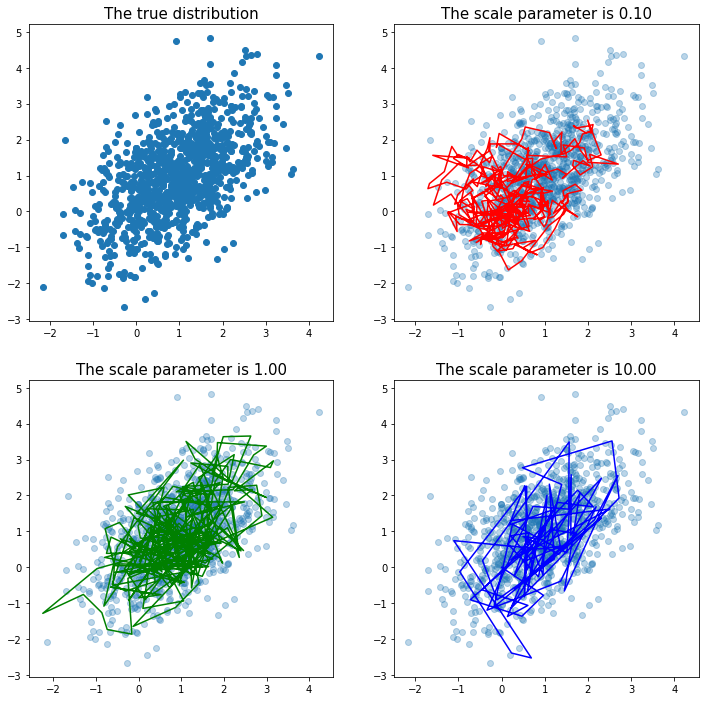

In [12]:
### from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import  stats
plt.figure(figsize=(12,12))
np.random.seed(42)

true_mean=np.array([1.0,1.0])
true_variance=np.array([[1.0,0.7],[0.7,1.5]])
true_rv=stats.multivariate_normal(mean=true_mean,cov=true_variance)

independent_samples=true_rv.rvs(size=1000)
plt.subplot(2,2,1)
plt.scatter(independent_samples[:,0],independent_samples[:,1])
plt.title("The true distribution",fontsize=15)

#MH algorithm using random walk proposal
init_sample=np.array([0.,0.])
proposed_scale_parameter=np.array([0.1,1,10])   # The variance of the proposed distribution
                                                # we will try three different value
sample_size=500
mcmc_samples=np.array(init_sample.reshape(-1,2))
received_samples_count=0
colors=['r','g','b']
for scale in range(3):
    plt.subplot(2,2,scale+2)
    received_samples_count=0
    mcmc_samples=np.array(init_sample.reshape(-1,2))
    for n in range(sample_size):
        proposed_sample=stats.multivariate_normal(mean=mcmc_samples[-1],
                                                  cov=proposed_scale_parameter[scale]*np.identity(2)).rvs()
        receive_probability=min(1.0,true_rv.pdf(proposed_sample)/true_rv.pdf(mcmc_samples[-1]))
        random_num=np.random.rand()
        if random_num>receive_probability:
            mcmc_samples=np.append(mcmc_samples,mcmc_samples[-1].reshape(-1,2),axis=0)
        else:
            mcmc_samples=np.append(mcmc_samples,proposed_sample.reshape(-1,2),axis=0)
            received_samples_count+=1
    plt.scatter(independent_samples[:,0],independent_samples[:,1],alpha=0.3)
    plt.plot(mcmc_samples[:,0],mcmc_samples[:,1],color=colors[scale])
    plt.title("The scale parameter is %.2f"%proposed_scale_parameter[scale],fontsize=15)
    print("The receive rate for scale=%.2f is:%.2f"%(proposed_scale_parameter[scale],
                                                     received_samples_count/sample_size))

## 3.4 Why MH works
The MH algorithm defines a Markov chain with the following transition matrix
\begin{align}
p(x'|x) &=
  \begin{cases}
    q(x'|x)r(x'|x)   & \quad \text{if } x' \not = x\\
    q(x|x)+\sum_{x'\not=x}q(x'|x)(1-r(x'|x))  & \quad \text{otherwise }
  \end{cases}   \\
r(x'|x) &=min(1,\alpha) \\
\alpha(x'|x) &=\frac{p^\ast(x')q(x|x')}{p^\ast(x)q(x'|x)} \\
\end{align}
This follows from a case analysis: if you move to $x'$ from $x$, you must have proposed it (with
probability $q(x'|x)$  and it must have been accepted (with probability $r(x'|x)$); otherwise you
stay in state $x$, either because that is what you proposed (with probability $q(x|x)$), or because
you proposed something else (with probability $q(x'|x))$ but it was rejected (with probability
$1 − r(x'|x)$ ).

Recall that a chian satisfies **detailed balance** if
$$
p(x'|x)p^\ast(x)=p(x|x')p^\ast(x')
$$
We have shown that if a chain satisfies detailed balance, then $p^\ast$ is its stationary distribution.Our goal is to show that the MH algorithm defines a transition function that satisfies detailed balance and hence that $p^\ast$is its stationary distribution.

For two different state $x$ and $y$ ,if $q(y|x)p^\ast(x)>q(x|y)p^\ast(y)$, we have 
$$
\alpha(y|x)=\frac{p^\ast(y)q(x|y)}{p^\ast(x)q(y|x)}<1 
$$.
Hence we have $r(y|x)=\alpha(y|x)$. Then we have
$$
p(y|x)=q(y|x)r(y|x)=q(y|x)\frac{p^\ast(y)q(x|y)}{p^\ast(x)q(y|x)}=\frac{p^\ast(y)}{p^\ast(x)}q(x|y)
$$
So we have
$$
p(y|x)p^\ast(x)=p^\ast(y)q(x|y)
$$
The backwards probability is
$$
p(x|y)=q(x|y)r(x|y)=q(x|y)
$$
Therefore, we have
$$
p(y|x)p^\ast(x)=p(x|y)p^\ast(y)
$$
for any different states $x$ and $y$. So detailed balance holds wrt $p^\ast$.
# 4. Speed and accuracy of MCMC
## 4.1 The burn-in phase
We start MCMC from an arbitrary initial state. only when the chain has “forgotten” where it started from will the samples be coming from the chain’s stationary distribution. Samples collected before the chain has reached its stationary distribution do not come from $p^\ast$, and are usually thrown away. The initial period, whose samples will be ignored, is called the **burn-in phase**. The amount of time it takes for a Markov chain to converge to the stationary distribution, and forget its initial state, is called the **mixing time**.

Computing the mixing time of a chain is in general quite difficult. One of the simplest approaches to assessing when the method has converged is to run multiple chains from very different overdispersed starting points, and to plot the samples of some variables of interest. This is called a **trace plot**. If the chain has mixed, it should have “forgotten” where it started from, so the trace plots should converge to the same distribution, and thus overlap with each other.

## 4.2 Estimated potential scale reduction(EPSR)
We can assess convergence more quantitatively as follows. The basic idea is to compare the variance of a quantity within each chain to its variance across chains,which is similar to ANOVA analysis. More precisely, suppose we collect $S$ samples(after burn-in) from each of $C$ chains of $D$ variables , $x_{isc},\,i=1:D,\,s=1:S,\,c=1:C$. Let $y_{sc}$ be a scalar quantity of interest derived from $x_{1:D,s,c}$. Define the with-in sequence mean and overall mean as
\begin{align}
\bar{y}_{\cdot,c} &=\frac{1}{S}\sum_{s=1}^Sy_{sc} \\
\bar{y}_{\cdot,\cdot} &=\frac{1}{C}\sum_{c=1}^C \bar{y}_{\cdot,c}
\end{align}
Define the between-sequence and within-sequence variance as 
\begin{align}
B  &=\frac{S}{C-1}\sum_{c=1}^C(\bar{y}_{\cdot,c}-\bar{y}_{\cdot,\cdot})^2 \\
W  &=\frac{1}{C}\sum_{c=1}^C\left[\frac{1}{S-1}\sum_{s=1}^S(y_{sc}-\bar{y}_{\cdot,c})^2 \right]
\end{align}
We can now construct two estimates of the variance of $y$. The first estimate is $W$ : this should
underestimate $var[y]$ if the chains have not ranged over the full posterior. The second estimate
is
$$
\hat{V}=\frac{S-1}{S}W+\frac{1}{S}B
$$
This is an estimate of $var[y]$ that is unbiased under stationarity, but is an overestimate if the
starting points were overdispersed. From this, we can define the following convergence diagnostic statistic, known as the **estimated potential scale reduction** or **EPSR**:
$$
\hat{R}=\sqrt{\frac{\hat{V}}{W}}
$$
If $\hat{R} \approx 1$ for any given quantity, then that estimate is reliable (or at least is not unreliable).
## 4.3 Accuracy of MCMC
The samples produced by MCMC are auto-correlated, which reduces their information content relative to independent samples. Suppose we want to estimate the mean of $f(X)$ for some function $f$, where $X \sim p(X)$. A Monte Carlo estimate is given by
$$
\bar{f}=\frac{1}{S}\sum_{s=1}^S f_s
$$
where $f_s=f(x_s)$ and $x_s \sim p(x)$. The variance of the MCMC estimate is given by
\begin{align}
Var_{MCMC}[\bar{f}]  &=\mathbb{E}\left[(\bar{f}-f^\ast)^2\right] \\
                     &=\mathbb{E}\left[\left(\frac{1}{S}\sum_{s=1}^S(f_s-f^\ast)\right)^2\right] \\
                     &=\frac{1}{S^2}\mathbb{E}\left[\sum_{s=1}^S(f_s-f^\ast)^2 \right]+\frac{1}{S^2}\sum_{s\not=t}\mathbb{E}\left[(f_s-f^\ast)(f_t-f^\ast)\right]
\end{align}
where the first term is the Monte Carlo estimate of the variance if the samples are independent and the second term depends on the correlation of the samples.
## 4.4 Problem with Metropolis-Hastings Simulations
* **The local-trap problem**.  In simulations of a complex system whose energy landscape is rugged, the local-trap problem refers to the sampler getting trapped in a local energy minimum indefinitely, rendering the simulation useless. The sampler is hard to jump from one local energy minimum to another local energy minimum.

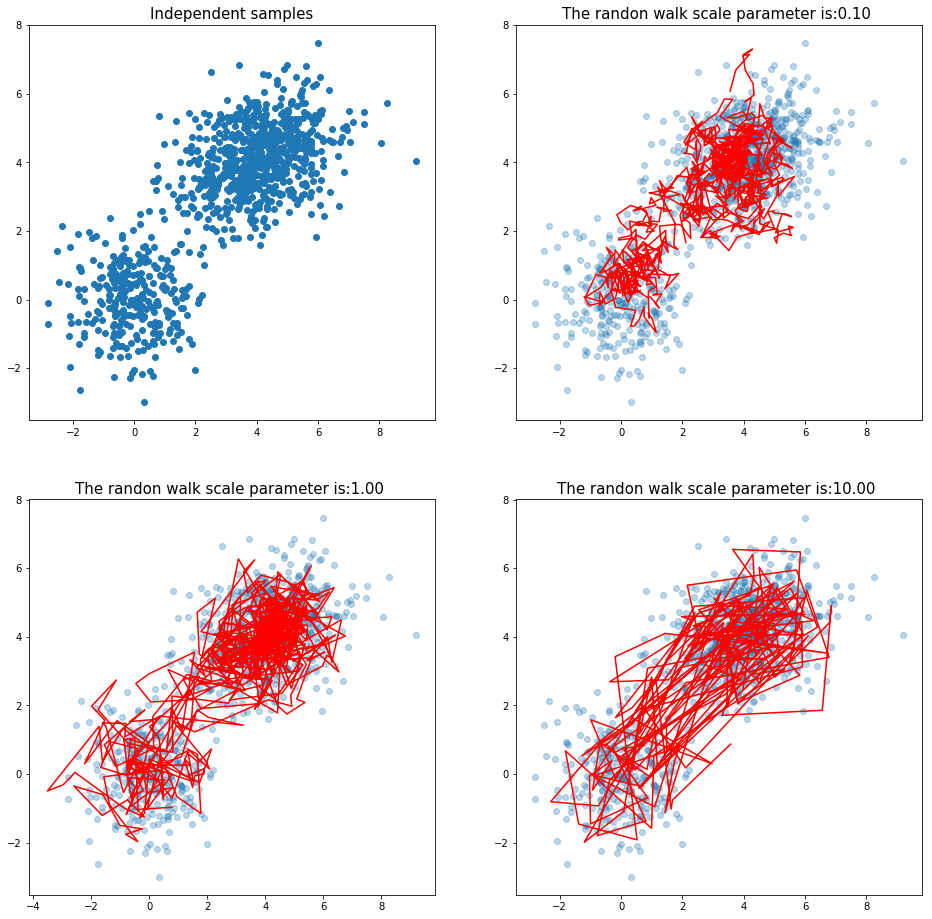

In [30]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))

#true center of each cluster
true_means=[[0,0],
           [4,4]]

#true variance of each cluster
true_covariance=[[[1.0,0],
                 [0,1.0]],
                [[1.6,0.4],
                [0.4,1.0]]]

#true prior probability of each cluster
true_pi=[0.3,0.7]

sample_size=1000
plt.subplot(2,2,1)
independent_samples=[]
rv0=stats.multivariate_normal(mean=true_means[0],cov=true_covariance[0])
rv1=stats.multivariate_normal(mean=true_means[1],cov=true_covariance[1])

def prob(x):
    return true_pi[0]*rv0.pdf(x)+true_pi[1]*rv1.pdf(x)

for i in range(sample_size):
    if np.random.rand()>true_pi[0]:
        independent_samples.append(rv1.rvs())
    else:
        independent_samples.append(rv0.rvs())
independent_samples=np.array(independent_samples)
plt.scatter(independent_samples[:,0],independent_samples[:,1])
plt.title("Independent samples",fontsize=15)

random_walk_scale=np.array([0.1,1,10])

for i in range(3):
    scale=random_walk_scale[i]
    plt.subplot(2,2,i+2)
    samples=stats.multivariate_normal(mean=[3.0,3.0],cov=3*np.identity(2)).rvs().reshape(-1,2)
    for s in range(sample_size):
        proposed_sample=stats.multivariate_normal(mean=samples[-1],cov=scale*np.identity(2)).rvs()
        receive_prob=min(1.0,prob(proposed_sample)/prob(samples[-1]))
        if np.random.rand()<receive_prob:
            samples=np.append(samples,proposed_sample.reshape(-1,2),axis=0)
        else:
            samples=np.append(samples,samples[-1].reshape(-1,2),axis=0)
    plt.scatter(independent_samples[:,0],independent_samples[:,1],alpha=0.3)
    plt.plot(samples[:,0],samples[:,1],c='r')
    plt.title("The randon walk scale parameter is:%.2f "%scale,fontsize=15)

* **inability to sample from distributions with intractable integrals**. Suppose that the target distribution of interest has density of the form $f(x) \propto c(x)\psi(x)$, where $c(x)$ denotes an intractable integral. Clearly, the MH algorithm cannot be applied to sample from f(x), as the acceptance probability would involve an unknown ratio $c(x')/c(x)$, where $x'$ denotes the proposed value.

# 5. Variants of the Metropolis-Hastings Algorithm
## 5.1 The Hit-and-Run Algorithm
The Hit-and-Run algorithm can be obtained by separating the process of creating a proposed jump in MH into two subprocesses.
* Generate a direction d from a distribution on the surface of the unit sphere. The most common choice of the distribution is the uniform distribution on the unit sphere.
* Generate a signed distance λ along the direction d

## 5.2 The Langevin Algorithm
The Langevin algorithm is rooted in the Langevin diffusion process, which is defined by the stochastic differential equation
$$
dX_t=dB_t+\frac{1}{2}\nabla\,log\,f(X_t)
$$
where $B_t$ is the standard Brownian motion. This process leaves $f$ as the stationary distribution. The implementation of the diffusion algorithm involves a discretization step as follows
$$
x^{t+1}=x^t+\sigma \epsilon_t+\frac{\sigma^2}{2}\nabla\,\log\,f(x^t)
$$
where $\epsilon_t \sim N_d(0,I_d)$ and $\sigma$ is the step size of discretization.Informally, the Langevin dynamics drive the random walk towards regions of high probability in the manner of a gradient flow.The Metropolis–Hastings accept/reject mechanism improves the mixing and convergence properties of this random walk.
* Propose a new state $$ x^\ast=x^t+\frac{\sigma^2}{2}\nabla\,log\,f(x^t)+\sigma\epsilon_t $$ where $\sigma$ is a user-specified parameter
* Calculate the receive ratio
\begin{align}
r &=min(1,\alpha) \\
\alpha &=\frac{f(x^\ast)exp\left(-\|x^t-x^\ast-\frac{\sigma^2}{2}\nabla\,\log\,f(x^\ast)\|^2/{2\sigma^2}\right)} {f(x^t)exp\left(-{\|x^\ast-x^t-\frac{\sigma^2}{2}\nabla\,\log\,f(x^t)\|^2}{2\sigma^2}\right)}
\end{align}

In practical applications, the optimal acceptance rate for this algorithms is 0.574.

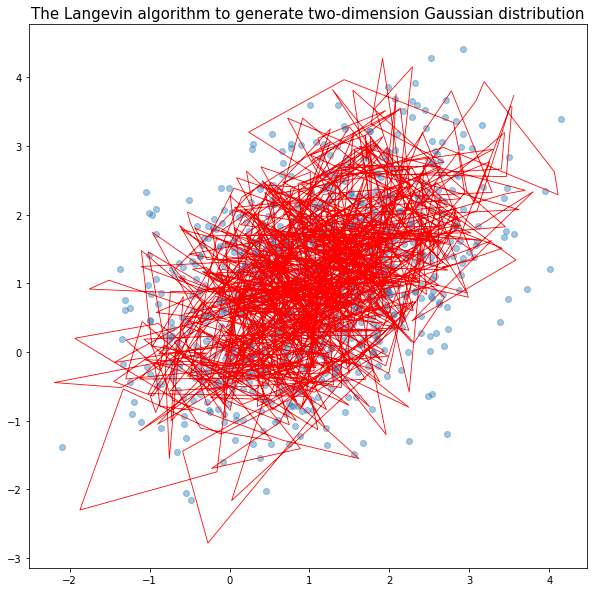

In [32]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(10,10))

true_mean=np.array([1.0,1.0])
true_variance=np.array([[1.0,0.5],[0.5,1.2]])
true_distribution=tfp.distributions.MultivariateNormalFullCovariance(loc=true_mean,
                                                                    covariance_matrix=true_variance)
independent_samples=stats.multivariate_normal(mean=true_mean,cov=true_variance).rvs(size=1000)

init_state=np.array([0.0,0.0])
samples,_=tfp.mcmc.sample_chain(num_results=1000,
                                current_state=init_state,
                                kernel=tfp.mcmc.MetropolisAdjustedLangevinAlgorithm
                                (target_log_prob_fn=true_distribution.log_prob,
                                step_size=0.75,
                                seed=42),
                               num_burnin_steps=500,
                               parallel_iterations=1)

sess=tf.Session()
samples_=sess.run(samples)
plt.scatter(independent_samples[:,0],independent_samples[:,1],alpha=0.4)
plt.plot(samples_[:,0],samples_[:,1],linewidth=0.8,c='r')
plt.title("The Langevin algorithm to generate two-dimension Gaussian distribution",fontsize=15)
plt.show()

# 5.3 Auxiliary Variable MCMC methods 
Consider the problem of sampling from a multivariate distribution with density function $f(x)$. It is known that in order to achieve better convergence of the simulation, one should try to integrate out as many components of $x $ as possible. However, sometimes one can include one or more additional variables in simulations to accelerate or facilitate the simulations. This often occurs in the following two scenarios:
* The target distribution $f(x)$ is multimodal: An auxiliary variable, such as temperature or some unobservable measurement, is included in simulations to help the system to escape from local-traps.
* The target distribution $f(x)$ includes an intractable normalizing constant: an auxiliary realization of $x$ is included in simulations to have the normalizing constants canceled.

The MH algorithm involves two basic components, the target distribution and the proposal distribution. The auxiliary variables can be added to the target distribution or the proposal distribution. The target distribution case can be implemented as follows:
* Specify an auxiliary variable $u$ and the conditional distribution $f(u|x)$ to form the joint distribution $f(x,u)=f(x)f(u|x)$
* Update $(x,u)$ using the MH algrithm.

The samples of $f(x)$ can then be obtained through marginalization. The proposal distribution case can be implemented as follows:
* Specify a proposal distribution $T(x',u|x)$, which satisfies $\int T(x',u|x)du=T(x'|x)$
* Generate a candidate sample (x',u) from the proposal $T(x',u|x)$ and accept it with probability
\begin{align}
r &=min(1,\alpha) \\
\alpha  &=\frac{f(x')T(x,u|x')}{f(x)T(x',u|x)} \\
\end{align}

Repeat this step to generate $N$ samples.
## 5.4 Simulated Annealing
Suppose that one aims to find the global minimum of an objecive function $H(x)$, which is also called the energy function in the standard terms of simulated annealing.By augmenting to the system an auxiliary variable,
the so-called temperature $T$, minimizing $H(x)$ is equivalent to sampling from the Boltzmann distribution $f(x,T) \propto exp\left(-H(x)/T\right) $ at a very small value
(closing to 0) of $T$. The reason is that when $T$ is close to 0, most of the mass of the distribution $f(x,T)$ concentrates on the global minimizers of $H(x)$.

In order to sample successfully from $f(x,T)$ at a very small value of $T$. Simulated Annealing  uses a sequential of Boltzmann distributions,$f(x,T_1),f(x,T_2),\ldots,f(x,T_m)$, where the temperatures form a decreasing order $T_1>T_2>\ldots>T_m \, \text{with}\, T_m=0 \,\text{and}\, T_1$ being reasonably large such that high temperature levels providing a good initial sample
* Initialize the simulation at temperature $T_1$ and an arbitrary sample $x_0$.
* At each temperature $T_i$, get $N_i$ samples from the distribution $f(x,T_i)$ using a MCMC sampler.Pass the final sample to the next lower temperature level as the initial sample.

From the viewpoint of auxiliary MCMC methods, simulated annealing simulates the augmented target distribution $f(x,T)$ with the auxiliary variable $T$ taking values from a finite set $\{T_1,T_2,\dots,T_m\}$ and in a fixed order from high to low.

The main difficulty of using simulated annealing is in choosing the cooling schedule. One cooling schedule of theoretical interest is the "logarithmic" cooling, which ensures the simulation to converge to the global minimum of $H(x)$ in probability 1.In practice, however, it is so slow that no one can afford to have such a long running time.A linearly or geometrically decreasing cooling schedule is commonly used, which can no longer guarantee the global minima to be reached.

The global minimum point is :1.95


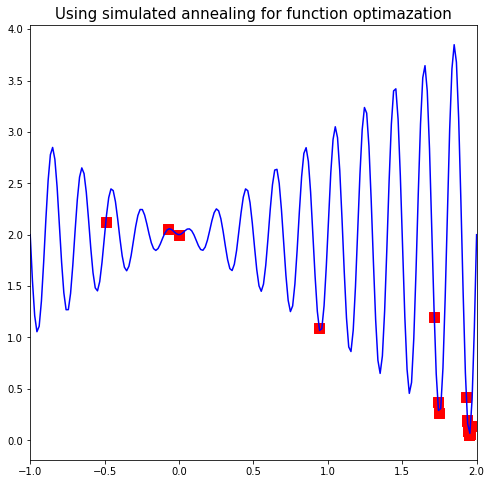

In [49]:
# Here we will use simulated annealing algorithm to solve the global minimum problem of a complex function
# f(x)=x*sin(10*pi*x)+2.0 in [-1,2]

import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
np.random.seed(42)

low_bound=-1
high_bound=2
init_temp=1.0
end_temp=1e-7
alpha=0.8  # The rate of cooling
n_samples_per_temp=20
random_walk_scale=1.0

def func(x):
    return x*np.sin(10*np.pi*x)+2.0

x=np.linspace(low_bound,high_bound,200)
y=func(x)
plt.plot(x,y,'b')
plt.xlim([low_bound,high_bound])

def log_prob(x,T):
    return (-func(x)/T)

def MH_algo(x_init,T):
    old_sample=x_init
    for i in range(n_samples_per_temp):
        proposed_sample=-100
        while proposed_sample< -1 or proposed_sample> 2:
            proposed_sample=stats.norm(loc=old_sample,scale=random_walk_scale).rvs()
        if np.log(np.random.rand())<(log_prob(proposed_sample,T)-log_prob(old_sample,T)):
            old_sample=proposed_sample
    return old_sample

T=init_temp
last_sample=0.0
trace=np.array([last_sample,func(last_sample)]).reshape(-1,2)
while T>end_temp:
    last_sample=MH_algo(last_sample,T)
    T=T*alpha
    trace=np.append(trace,np.array([last_sample,func(last_sample)]).reshape(-1,2),axis=0)
plt.scatter(trace[:,0],trace[:,1],marker='s',color='r',s=100)
plt.title("Using simulated annealing for function optimazation",fontsize=15)
print("The global minimum point is :%.2f"% last_sample)

## 5.5 The Slice Sampler
Suppose that one is interested in sampling from a density $f(x)$. Recall that sampling $x \sim f(x)$ is equivalent to sampling uniformly from the area under the graph $f(x)$
$$
\mathcal{A}=\{(x,u):0\leq u \leq f(x)\}
$$
which is the basis of the acceptance-rejection algorithm. To achieve this goal, one can augment the target distribution by an auxiliary variable $u$, which uniformly distributed on the interval $[0,f(x)]$. Therefore, the joint density function is
$$
f(x,u)=f(x)f(u|x) \propto 1_{(x,u) \in \mathcal{A}}
$$
which can be sampled using the Gibbs sampler as follows
* Draw $u_{t+1} \sim \,\text{Uniformm}\, [0,f(x_t)]$
* Draw $x_{t+1}$ uniformly from the region $\{x:f(x)\geq u_{t+1} \}$

This sampler potentially can be more efficient than the simple MH algorithm for multimodal distributions, due
to the free between-mode-transitions within a slice and avoid local-trap problem. However, the slice sampler is often difficult to implement in practice. For many distributions, sampling uniformly from the region $ \{x:f(x)\geq u_{t+1} \}$ is almost as difficult as sampling from the original distribution $f(x)$.

When $f(x)$ can be decomposed into a product of $k$ distribution functions, that is, $f(x) \propto f_1 (x) \times f_2 (x) \times \ldots f_k (x)$, the slice sampler can be easily implemented. To sample from such a distribution, they introduce $k$ auxiliary variables, $U_1,\ldots,U_k$, and propose the following algorithm
* Draw $u_{t+1}^i \sim \,\text{Uniform}\,[0,f_i(x_t)]$
* Draw $x_{t+1}$ uniformly from the region $\mathcal{S}=\bigcap_{i=1}^k \left\{x:f_i(x)\geq u_{t+1}^i\right\}$

# 6.MCMC using Hamiltonian Dynamics (HMC)
In traditional HM algorithm, the state space is slowly explored when Metropolis updates are done using a simple random-walk proposal distribution. **The HMC is aimed at accelaring this process by proposing a state distant from the current state but nevertheless still have a high acceptance proability**. This part is almost copied from the [Neal's paper](https://arxiv.org/pdf/1206.1901.pdf)
## 6.1 Hamilton's Equations
Hamiltonian dynamics operators on a $d$-dimensional **position** vector $q$ and a $d$-dimensional **momentum** vector $p$, so that the full state space has $2d$ dimensions. The **position** vector $q$ is what we want to sample and the **momentum** vector $p$ is auxiliary variable. The partial derivatives of the Hamiltonian determine how $q$ and $p$ change over time $t$ according to Hamilton’s equations:
\begin{align}
\frac{\partial q_i}{\partial t}  &=\frac{\partial H}{\partial p_i} \\
\frac{\partial p_i}{\partial t}  &=-\frac{\partial H}{\partial q_i}
\end{align}
for $i=1,\ldots,d$ and $H(q,p)$ is called the **Hamiltonian**.  For any time interval of duration $s$, these equations define a mapping  $T_s$ from the state at any time $t$ to the state at time $t+s$.

For HMC we usually use **Hamiltonian** functions that can be writen as 
$$
H(q,p)=U(q)+K(p)
$$
where $U(q)$ is called the **potential energy**, and will be defined to be minus the log probability density of the distribution f(q) for $q$ that we wish to sample.
$$
U(q)=-log\,f(q)
$$
$K(p)$ is called the **kinetic energy** and is usually defined as
$$
K(p)=p^TM^{-1}p/2
$$
where $M$ is a symmetric, positive-definite “mass matrix,” which is typically diagonal, and is often a scalar multiple of the identity matrix.This form for $K(p)$ corresponds to minus the log probability density  of the zero-mean Gaussian distribution with covariance matrix M.

With these forms for $H$ and $K$, Hamilton's equations becomes
\begin{align}
\frac{\partial q_i}{\partial t}  &=[M^{-1}p]_i \\
\frac{\partial p_i}{\partial t}  &=-\frac{\partial U}{\partial q_i}
\end{align}
## 6.2  Properties of Hamiltonian Dynamics
### 6.2.1 Reversibility
The mapping $T_s$ of the state at time $t,(q_t,p_t)$ , to the state at time $t + s,(q_{t+s},p_{t+s})$, has an inverse process and therefore is reversible. The inverse process is just from $(q_{t+s},-p_{t+s})$ to $(q_t,-p_t)$.
### 6.2.2 Conservation of the Hamiltonian
\begin{align}
\frac{dH}{dt} &=\sum_{i=1}^d\left[\frac{\partial H}{\partial q_i}\frac{dq_i}{dt}+\frac{\partial H}{\partial p_i}\frac{dp_i}{dt}\right] \\
              &=\sum_{i=1}^d \left[\frac{\partial H}{\partial q_i}\frac{\partial H}{\partial p_i}+\frac{\partial H}{\partial p_i}\left(-\frac{\partial H}{\partial q_i}\right)\right] \\
              &=0
\end{align}
### 6.2.3 Volume Preservation (Liouville's theorem)
If we apply the mapping $T_s$ to the points in some region $R$ of $(q,p)$ space, with some volume $V$,the image of $R$ under $T_s$ will also have volume $V$. The significance of volume preservation for MCMC is that we need not account for any change in volume in the acceptance probability for Metropolis updates.

## 6.3 Discretizing Hamilton's Equations (Leapfrog Method)
This part is just temporal discretization schemes widely used in the [CFD community](https://en.wikipedia.org/wiki/Temporal_discretization).
### 6.3.1  Euler's Method
Perhaps the best-known way to approximate the solution to a system of differential equations is Euler’s method. For Hamilton’s equations, this method performs the following steps, for each component of position and momentum
\begin{align}
p_i(t+\delta)&=p_i(t)+\delta\frac{dp_i}{dt}=p_i(t)-\delta\frac{\partial U}{\partial q_i}\mid_t    \\
q_i(t+\delta)&=q_i(t)+\delta\frac{dq_i}{dt}=q_i(t)+\delta\frac{\partial K}{\partial p_i}\mid_t   \\
\end{align}
But the Euler's method to approximate the dynamics might produces a trajectory that diverges to infinity.Think about the CFD algorithm, you will get the idea.
<img src="imgs/2.png" alt="Drawing" style="width: 250px;"/>
### 6.3.2 A Modification of Euler's Method
We can modify the Euler's method as follows
\begin{align}
p_i(t+\delta)&=p_i(t)-\delta\frac{\partial U}{\partial q_i}\mid_{t}   \\
q_i(t+\delta)&=q_i(t)+\delta\frac{\partial K}{\partial p_i}\mid_{t+\delta}    \\
\end{align}
We simply use the new value for the momentum variables $p_i$ , when computing the new value for the position variables $q_i$. The performance of the Modification of Euler's Method works better than the original.
<img src="imgs/3.png" alt="Drawing" style="width: 250px;"/>
### 6.3.3 Leapfrog Method
Even better results can be obtained with the **leapfrog** method, which works as follows
\begin{align}
p_i(t+\delta/2) &=p_i(t)-\frac{\delta}{2}\frac{\partial U}{\partial q_i}\mid_t \\
q_i(t+\delta)&=q_i(t)+\delta\frac{\partial K}{\partial p_i}\mid_{t+\delta/2} \\
p_i(t+\delta)&=p_i(t+\delta/2)-\frac{\delta}{2}\frac{\partial U}{\partial q_i}\mid_{t+\delta}
\end{align}
We start with a half step for the momentum variables, then do a full step for the position variables, using the new values of the momentum variables, and finally do another half step for the momentum variables, using the new values for the position variables.
<img src="imgs/4.png" alt="Drawing" style="width: 250px;"/>

## 6.4 MCMC from Hamiltonian Dynamics
Using Hamiltonian dynamics to sample from a distribution requires translating the density function for this distribution to a potential energy function and introducing "momentum" variales to go with the original variables of interest (which means “position” variables).
### 6.4.1 Probaility and the Hamiltonian
The Hamiltonian is an energy function for the joint state of position $q$ and momentum $p$, and so defines a joint distribution for them as follows:
$$
P(p,q)=\frac{1}{Z}exp\left(\frac{-H(q,p)}{T}\right)
$$
Note that the invariance of H under Hamiltonian dynamics means that a Hamiltonian trajectory will (if simulated exactly) move within a hypersurface of constant probability density.

If $H(q,p)=U(q)+K(p)$, the joint distribution is
$$
P(p,q)=\frac{1}{Z}exp\left(\frac{-U(q)}{T}\right)exp\left(\frac{-K(p)}{T}\right)
$$
### 6.4.2 The Hamiltonian Monte Carlo Algorithm
We can choose the distribution of the momentum variables $p$ which are independentof $q$ , as we wish, specifying the distribution via the kinetic energy function $K(p)$. If we use $K(p)=p^TM^{-1}p/2$, we are assuming that $p$ have a zero-mean multivariate Gaussian distribution.

Each iteration of the HMC algorithm has two steps. The first changes only the momentum; the second may change both position and momentum.
* In the first step, new values for the momentum variables are randomly  drawn from their Gaussian distribution,independently of the current values of the position variables.
* In the second step, a Metropolis update is performed.Hamiltonian dynamics is used to propose a new state.Starting with the current state $(q,p)$, Hamiltonian dynamics is simulated for $L$ steps using the leapfrog method, with a stepsize of $\delta$. Here, $L$ and $\delta$ are parameters of the algorithm, which need to be tuned to obtain good performance. This proposed state is accepted as the next state of the Morkov chain with probability
\begin{align}
r &=\text{min}\left[1,\frac{exp(-H(q^\ast,p^\ast))}{exp(-H(q,p))}\right] \\
  &=\text{min}\left[1,exp\left(-U(q^\ast)+U(q)-K(p^\ast)+K(p)\right)\right]\\
\end{align}

If we look at HMC as sampling from the joint distribution of q and p, the Metropolis step using a proposal found by Hamiltonian dynamics leaves the probability density for $(q, p)$ unchanged or almost unchanged. Movement to $(q, p)$ points with a different probability density is accomplished only by the first step in an HMC iteration, in which $p$ is replaced by a new value. Fortunately, this replacement of $p$ can change the probability density for $(q, p)$ by a large amount, so movement to points with a different probability density is not a problem.

The receive probability of HMC is:0.9980


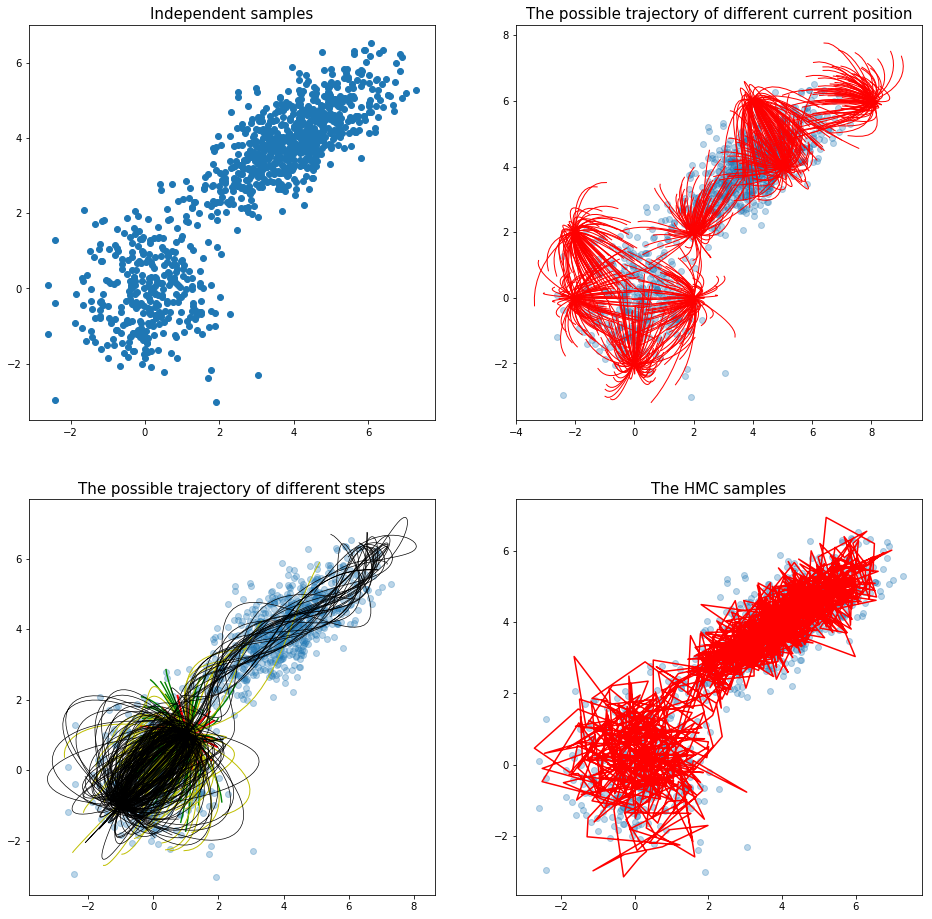

In [22]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  cm
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(16,16))

#true center of each cluster
true_means=[[0,0],
           [4,4]]

#true variance of each cluster
true_covariance=[[[1.0,0],
                 [0,1.0]],
                [[1.6,0.95],
                [0.95,1.0]]]

#true prior probability of each cluster
true_pi=[0.3,0.7]

sample_size=1000
plt.subplot(2,2,1)
independent_samples=[]
rv0=stats.multivariate_normal(mean=true_means[0],cov=true_covariance[0])
rv1=stats.multivariate_normal(mean=true_means[1],cov=true_covariance[1])

def prob(x):
    return true_pi[0]*rv0.pdf(x)+true_pi[1]*rv1.pdf(x)

for i in range(sample_size):
    if np.random.rand()>true_pi[0]:
        independent_samples.append(rv1.rvs())
    else:
        independent_samples.append(rv0.rvs())
independent_samples=np.array(independent_samples)
plt.scatter(independent_samples[:,0],independent_samples[:,1])
plt.title("Independent samples",fontsize=15)

def minus_log_prob_gradient(x):
    pdf0=rv0.pdf(x)
    pdf1=rv1.pdf(x)
    gradient0=np.matmul(np.linalg.inv(true_covariance[0]),np.array(true_means[0])-x)
    gradient1=np.matmul(np.linalg.inv(true_covariance[1]),np.array(true_means[1])-x)
    return -(true_pi[0]*pdf0*gradient0+true_pi[1]*pdf1*gradient1)/(prob(x))

def leapfrog(init_x,steps,delta,mass_matrix,plot_flag,ax=None,plot_kws=None):
    init_p=stats.multivariate_normal(mean=[0.0,0.0],cov=mass_matrix).rvs()
    mass_matrix_inv=np.linalg.inv(mass_matrix)
    p=np.array(init_p).reshape(-1,2)
    x=np.array(init_x).reshape(-1,2)
    for i in range(steps):
        p_half=p[-1]-delta/2.0*minus_log_prob_gradient(x[-1])
        x=np.append(x,(x[-1]+delta*np.matmul(mass_matrix_inv,p_half)).reshape(-1,2),axis=0)
        p=np.append(p,(p_half-delta/2.0*minus_log_prob_gradient(x[-1])).reshape(-1,2),axis=0)
    
    if plot_flag:
        ax.plot(x[:,0],x[:,1],c=plot_kws['color'],linewidth=plot_kws['linewidth'])
        
    return (p[-1],x[-1],p[0])

ax2=plt.subplot(2,2,2)
trajectory_num=100
steps_per_iter=10
step_size=0.1
init_x=np.array([[0,-2.0],
                 [-2.0,0],
                 [-2.0,2.0],
                 [2,2],
                 [2,0],
                 [8.0,6.0],
                [4.0,6.0],
                [5.0,4.0]])
mass_matrix=1.0*np.identity(2)
ax2.scatter(independent_samples[:,0],independent_samples[:,1],alpha=0.3)
for i in range(init_x.shape[0]):
    for t in range(trajectory_num):
        leapfrog(init_x[i],steps_per_iter,step_size,mass_matrix,True,ax2,{"color":'r',"linewidth":1})
ax2.set_title("The possible trajectory of different current position",fontsize=15)

ax3=plt.subplot(2,2,3)
steps_per_iter_candidate=[5,10,20,100]
colors=['r','g','y','k']
init_x=np.array([1.0,1.0])
ax3.scatter(independent_samples[:,0],independent_samples[:,1],alpha=0.3)
for i in range(len(steps_per_iter_candidate)):
    for t in range(trajectory_num):
        leapfrog(init_x,steps_per_iter_candidate[i],step_size,mass_matrix,
                 True,ax3,{"color":colors[i],"linewidth":2.0*np.power(0.7,i)})
ax3.set_title("The possible trajectory of different steps",fontsize=15)

ax4=plt.subplot(2,2,4)
steps_per_iter=10
init_x=np.array([1.0,1.0])
ax4.scatter(independent_samples[:,0],independent_samples[:,1],alpha=0.3)
HMC_samples=init_x.reshape(-1,2)
kinetic_rv=stats.multivariate_normal(mean=[0.0,0.0],cov=mass_matrix)
receive_count=0
for i in range(sample_size):
    p_star,x_star,p_init=leapfrog(HMC_samples[-1],steps_per_iter,step_size,mass_matrix,False)
    receive_prob=min(1.0,prob(x_star)*kinetic_rv.pdf(p_star)/prob(HMC_samples[-1])/kinetic_rv.pdf(p_init))
    if np.random.rand()<receive_prob:
        HMC_samples=np.append(HMC_samples,x_star.reshape(-1,2),axis=0)
        receive_count+=1
    else:
        HMC_samples=np.append(HMC_samples,HMC_samples[-1].reshape(-1,2),axis=0)
ax4.plot(HMC_samples[:,0],HMC_samples[:,1],c='r')
ax4.set_title("The HMC samples",fontsize=15)
print("The receive probability of HMC is:%.4f"%(receive_count/ np.float32(sample_size)))
plt.show()